## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```



In [ ]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

As the noise/standard deviation around the clusters increases, the distinctness of the clusters decreases eventually turning into a random scatter plot.

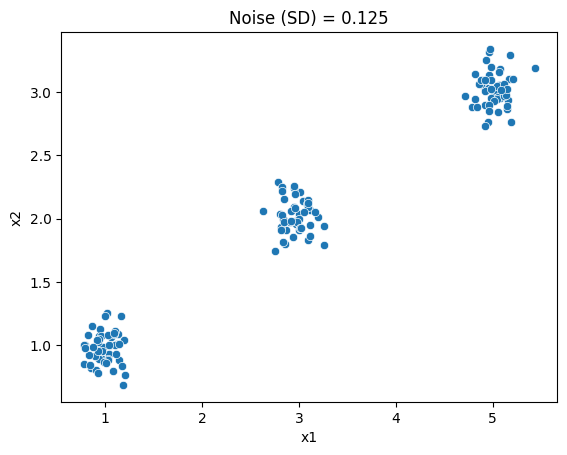

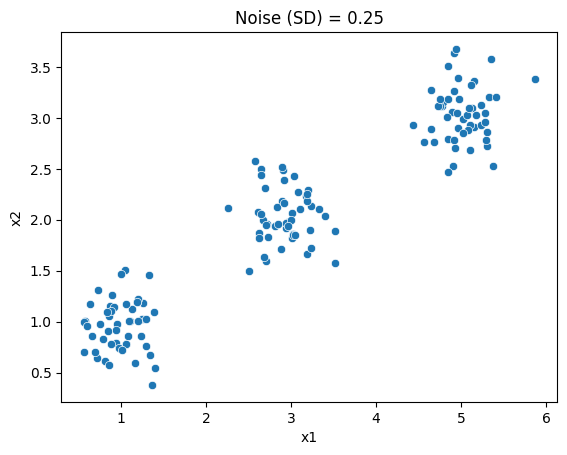

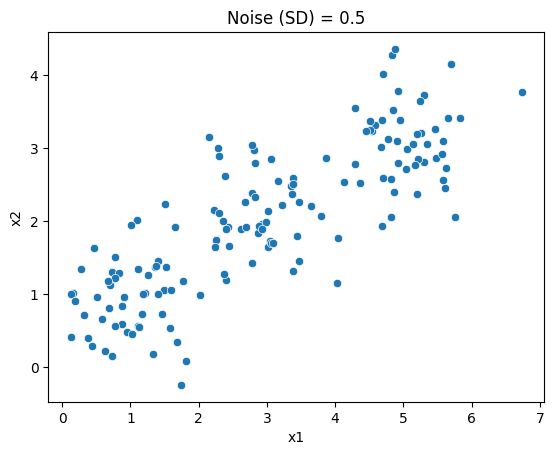

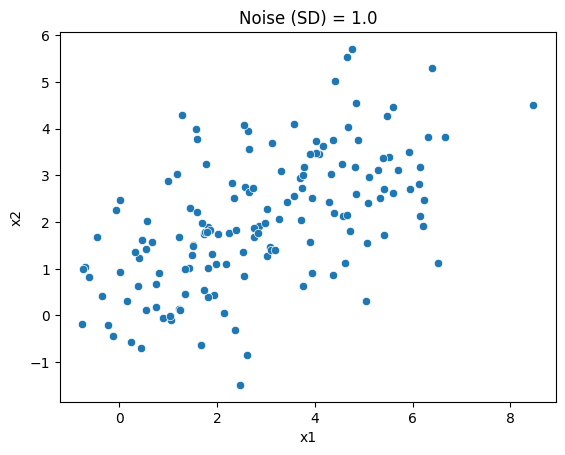

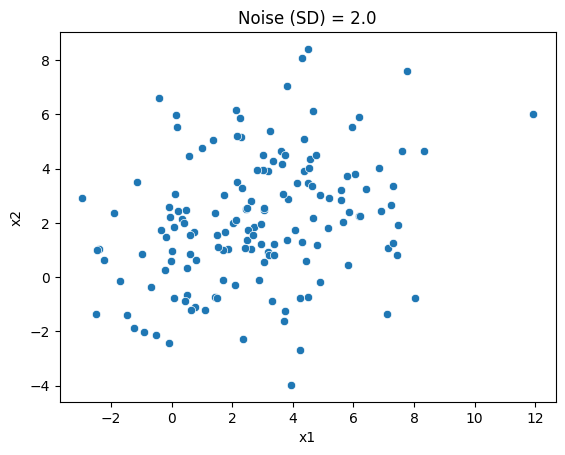

In [ ]:
scatter0125 = sns.scatterplot(x='x1',y='x2',data=df0_125).set_title('Noise (SD) = 0.125')
plt.show()
scatter025 = sns.scatterplot(x='x1',y='x2',data=df0_25).set_title('Noise (SD) = 0.25')
plt.show()
scatter05 = sns.scatterplot(x='x1',y='x2',data=df0_5).set_title('Noise (SD) = 0.5')
plt.show()
scatter1 = sns.scatterplot(x='x1',y='x2',data=df1_0).set_title('Noise (SD) = 1.0')
plt.show()
scatter2 = sns.scatterplot(x='x1',y='x2',data=df2_0).set_title('Noise (SD) = 2.0')
plt.show()

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

When the noise is low, the data forms distinct clusters making the elbow more visible and clear. This means there is a clear point on the scree plot that shows where the SSE levels, making optimal k selection for clustering clearer. However, when the noise is high and the data doesn't form distinct clusters, the elbow becomes more vague. As a result, it is more difficult to select an optimal k when there is much variation around the cluster centers.


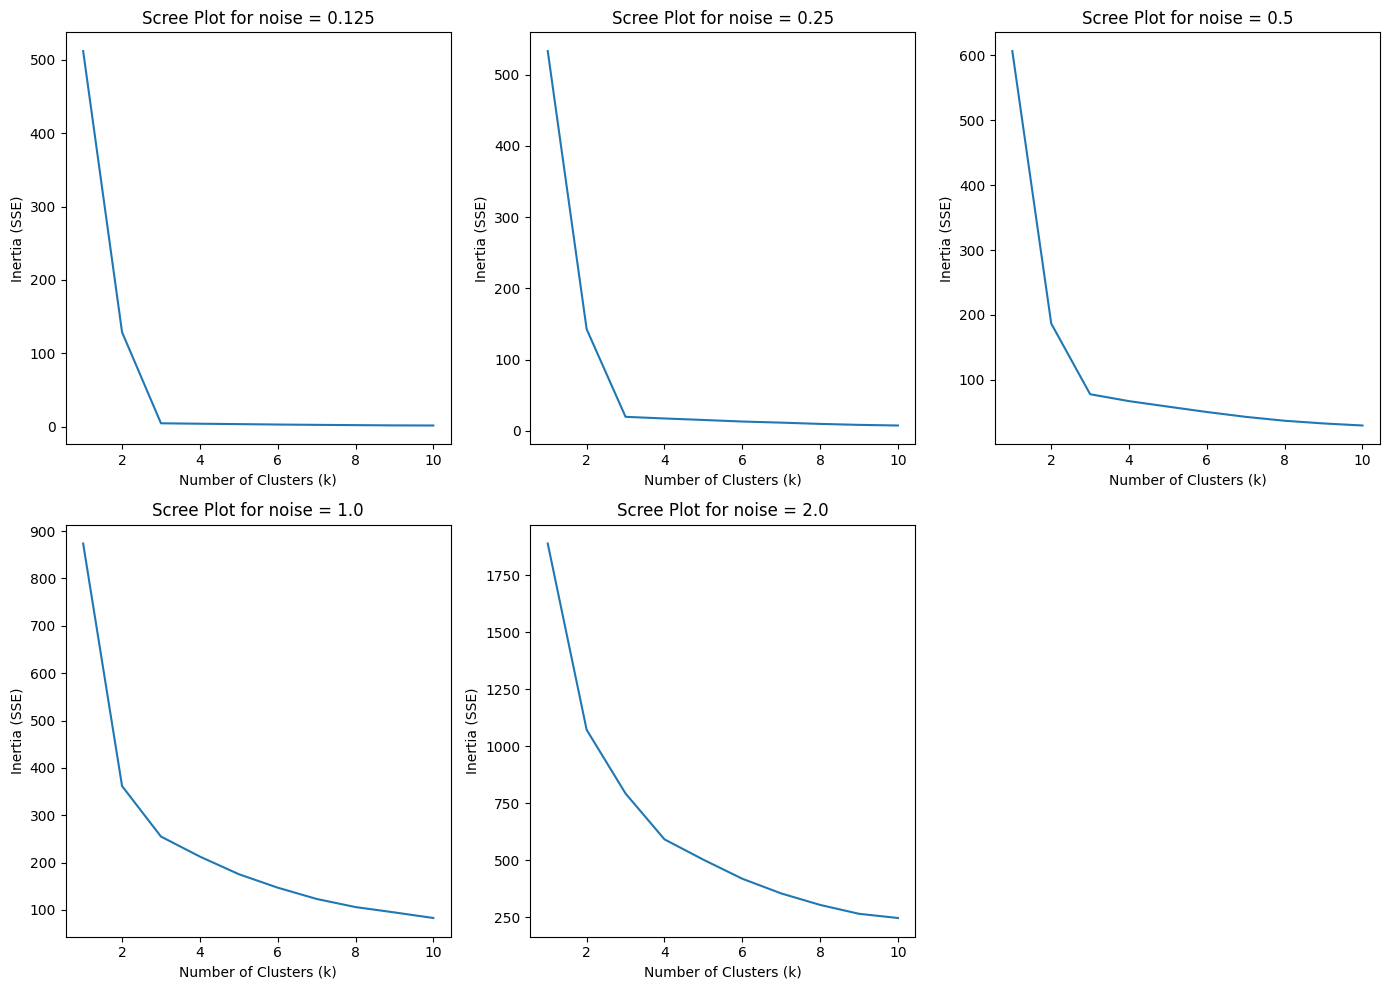

In [ ]:
from sklearn.cluster import KMeans

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]

k_bar = 10
SSE = []

plt.figure(figsize=(14, 10))

for i in range(len(datasets)):
    df = datasets[i]
    noise_level = noise_levels[i]

    X = df[['x1', 'x2']].values

    for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X) # Fit the model
      SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector


    plt.subplot(2, 3, i+1)  # Create subplots (2 rows, 3 columns)
    sns.lineplot(x=np.arange(1, k_bar+1), y=SSE)
    plt.title(f'Scree Plot for noise = {noise_level}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (SSE)')

    SSE.clear()

plt.tight_layout()
plt.show()

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow in a scree plot represents the point at the reduction in SSE (inertia) from adding more clusters slows down significantly. Before the elbow, addings more clusters is beneificial as in drastically reduces the SSE; however, adding more clusters after the elbow only slightly reduces the SSE.

In the beginning, having very few clusters poorly fits the model as the cluster centers don't represent the underlying data structure. As a result, the SSE will decrease significantly as you add more clusters because the points will be grouped appropriately. Once you reach the elbow, adding more clusters will no longer decrease the SSE as significantly as the optimal number of clusters the represnt the underly stgructure of the data. At this point, you have captured  most of the meaningful structure in the data without overcomplicating the model.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

military_data ='https://raw.githubusercontent.com/ashleynguyen04/clustering/refs/heads/main/assignment/data/SIPRI%20Military%20Expenditure%20Database.csv'
df = pd.read_csv(military_data)

df2020 = df[df['Year'] == 2020]
df2020 = df2020.dropna()


2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?

The amount a country spends on militiary is independent of the amount they spend per capita. The US is an extreme outlier in its own cluster, spending the most total and per capital on their military. Cluster membership seems to be mainly determined by how much the country spends per capita, as they are all spending about the same amount in total (besdies the US).


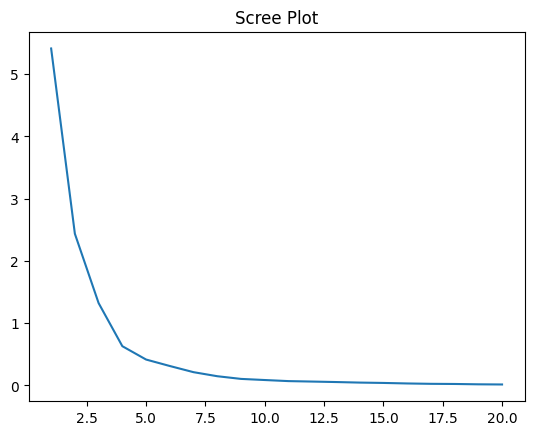

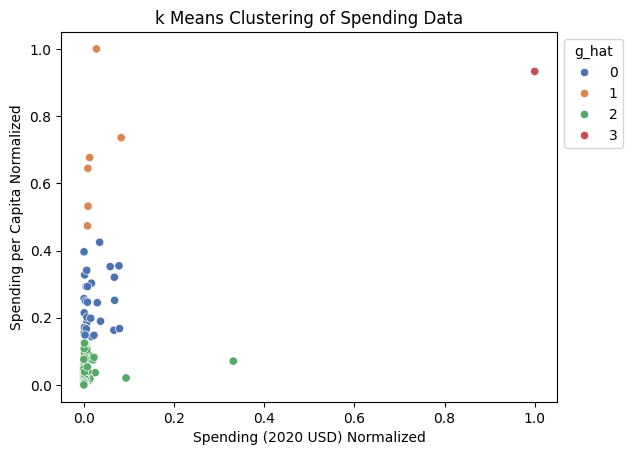

      Spending (2020 USD) Normalized                                         \
                               count      mean       std      min       25%   
g_hat                                                                         
0                               30.0  0.021929  0.026443  0.00051  0.002936   
1                                6.0  0.024968  0.029370  0.00782  0.009012   
2                              111.0  0.006232  0.032639  0.00000  0.000156   
3                                1.0  1.000000       NaN  1.00000  1.000000   

                                    Spending per Capita Normalized            \
            50%       75%       max                          count      mean   
g_hat                                                                          
0      0.007514  0.033772  0.079271                           30.0  0.240850   
1      0.011069  0.024215  0.082927                            6.0  0.677089   
2      0.000480  0.002940  0.331409           

In [139]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

df2020.loc[:, 'Spending (2020 USD) Normalized'] = maxmin(df2020['Spending (2020 USD)'])
df2020.loc[:, 'Spending per Capita Normalized'] = maxmin(df2020['Spending per Capita'])

#scree plot
X = df2020[['Spending (2020 USD) Normalized','Spending per Capita Normalized']]
SSE = []
k_bar = 20

for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X) # Fit the model
      SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')
plt.show()

#scatter plot
model = KMeans(n_clusters = 4, max_iter=300, n_init = 10, random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df2020['g_hat'] = model.predict(X) # Predict values
plot = sns.scatterplot(x='Spending (2020 USD) Normalized',y='Spending per Capita Normalized',data=df2020, hue='g_hat',palette='deep') # Scatterplot of the clustering
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.title('k Means Clustering of Spending Data')
plt.show()

#describe table
cluster_description = df2020.groupby('g_hat')[['Spending (2020 USD) Normalized', 'Spending per Capita Normalized']].describe()
print(cluster_description)
US_cluster = df2020[df2020['Country'] == 'United States of America']['g_hat'].values[0]
print(f"United States is in cluster {US_cluster}")


3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?

The graph has a positive correlation with countries with a higher % of government spending tend to have a higher % of GDP. Compared to part 2, this shows a more nuance view of the country's military priorites; however, the clusters aren't as distinct.

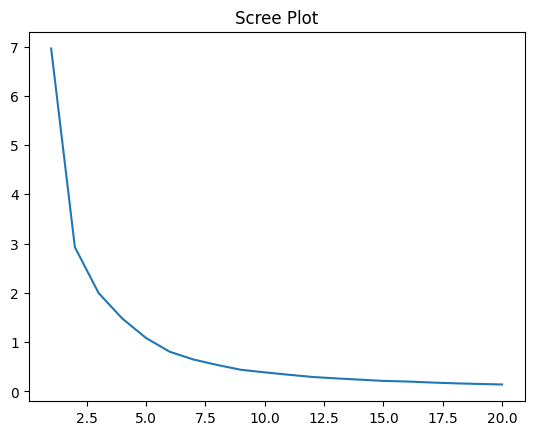

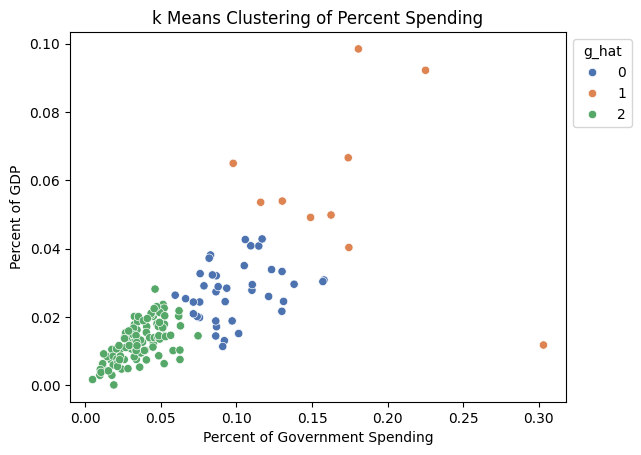

      Percent of Government Spending                                          \
                               count      mean       std       min       25%   
g_hat                                                                          
0                               39.0  0.098683  0.024125  0.059520  0.082430   
1                               10.0  0.171289  0.058725  0.097882  0.135010   
2                               99.0  0.035777  0.014549  0.004896  0.025921   

                                    Percent of GDP                      \
            50%       75%       max          count      mean       std   
g_hat                                                                    
0      0.092044  0.112633  0.157918           39.0  0.027412  0.008191   
1      0.168248  0.179081  0.303027           10.0  0.058071  0.024867   
2      0.034261  0.047402  0.074624           99.0  0.012664  0.005681   

                                                         
            min 

In [140]:
X2 = df2020[['Percent of Government Spending', 'Percent of GDP']]
X2 = X2.apply(maxmin)

#scree plot
SSE = []
k_bar = 20
for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X2) # Fit the model
      SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')
plt.show()

#scatter plot
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Pass centroids and options into the model
model = model.fit(X2) # Initialize a kmc model
df2020['g_hat'] = model.predict(X2) # Predict values
plot2 = sns.scatterplot(x='Percent of Government Spending',y='Percent of GDP',data=df2020, hue='g_hat',palette='deep') # Scatterplot of the clustering
sns.move_legend(plot2, "upper left", bbox_to_anchor=(1, 1))
plt.title('k Means Clustering of Percent Spending')
plt.show()

#describe table
cluster_description = df2020.groupby('g_hat')[['Percent of Government Spending', 'Percent of GDP']].describe()
print(cluster_description)
US_cluster = df2020[df2020['Country'] == 'United States of America']['g_hat'].values[0]
print(f"United States is in cluster {US_cluster}")

4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?

When adding more predictive variables in kMeans clustering, the clusters become more precise/indicative as there are more factors to group them by.


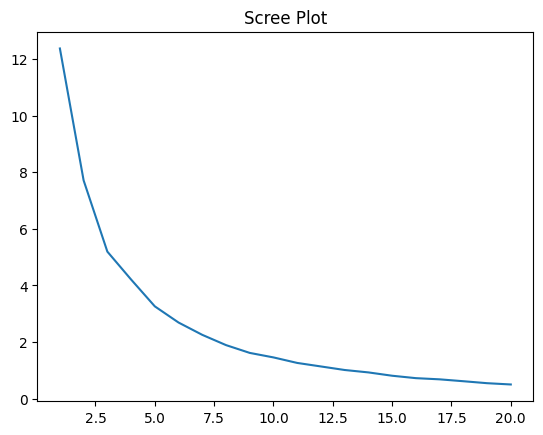

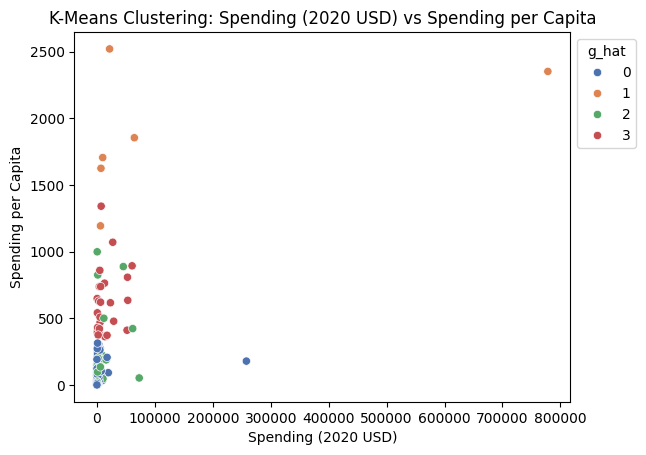

In [143]:
X3 = df2020[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']]

X3 = X3.apply(maxmin)

#scree plot
SSE = []
k_bar = 20
for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X3) # Fit the model
      SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')
plt.show()

model = KMeans(n_clusters=4, max_iter=300, n_init = 10, random_state=0) # Pass centroids and options into the model
model = model.fit(X3) # Initialize a kmc model
df2020['g_hat'] = model.predict(X3) # Predict values
plot3 = sns.scatterplot(x='Spending (2020 USD)', y='Spending per Capita', data=df2020, hue='g_hat', palette='deep')
sns.move_legend(plot3, "upper left", bbox_to_anchor=(1, 1))
plt.title('K-Means Clustering: Spending (2020 USD) vs Spending per Capita')
plt.show()


**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?